In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix


#dataset reading and preprocessing

In [2]:
#loading the data

df = pd.read_csv("/content/drive/MyDrive/ML/Mini-Project/red_wine_quality.csv");

df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# null value check
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Now let's see the effect of features on the quality of wine

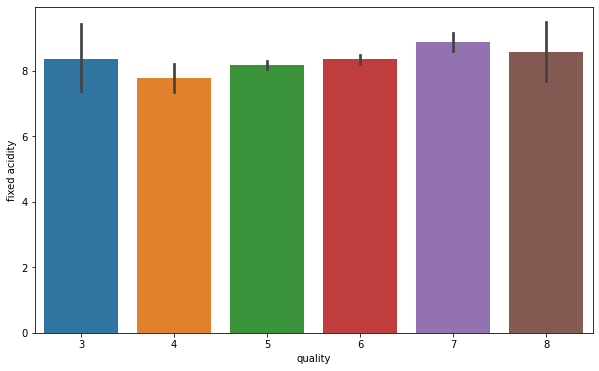

In [6]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'fixed acidity', data = df)



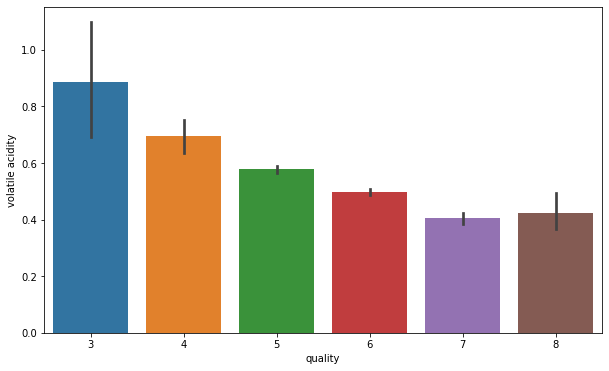

In [7]:

#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'volatile acidity', data = df)




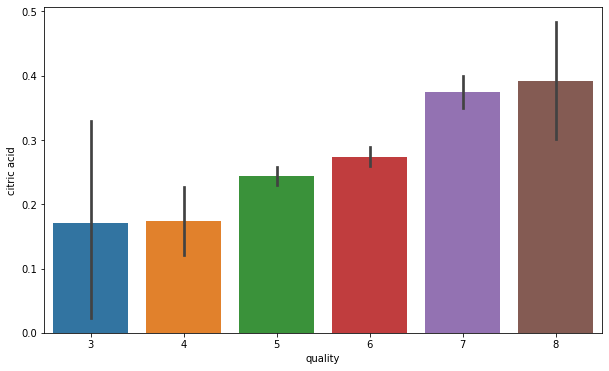

In [8]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'citric acid', data = df)





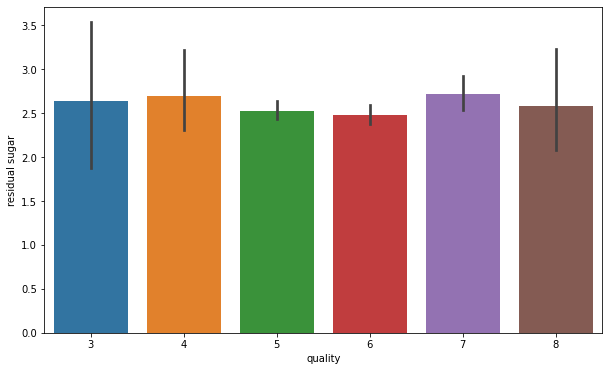

In [9]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'residual sugar', data = df)





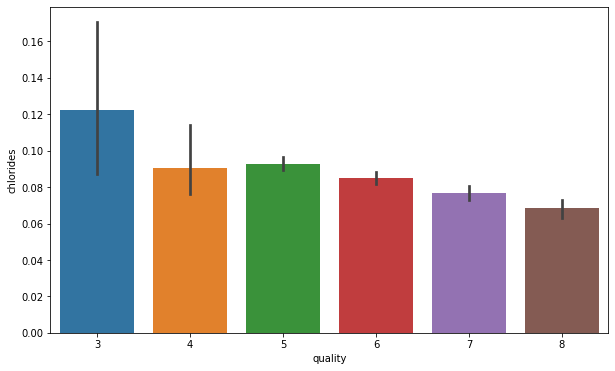

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'chlorides', data = df)





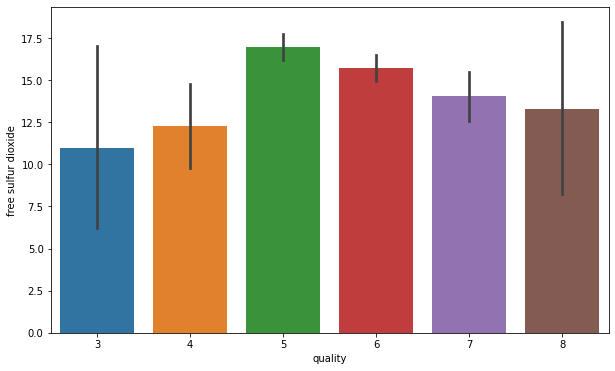

In [11]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)





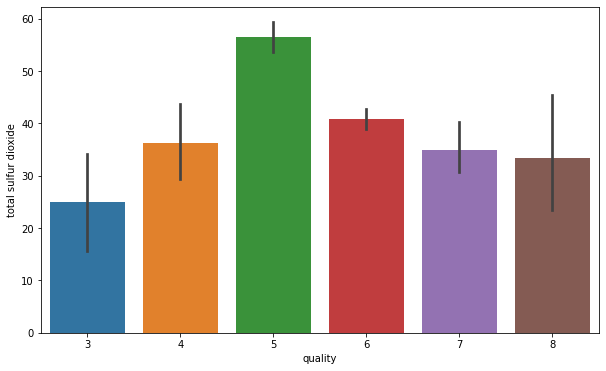

In [12]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)




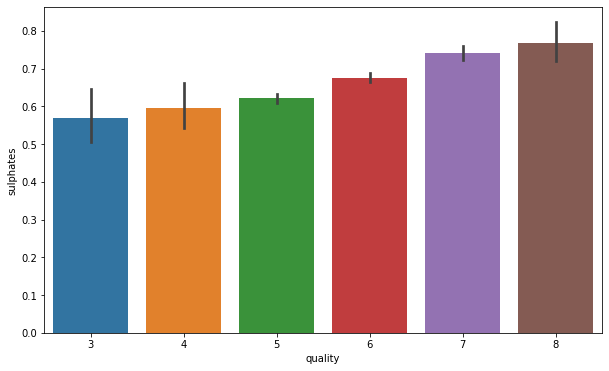

In [13]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'sulphates', data = df)




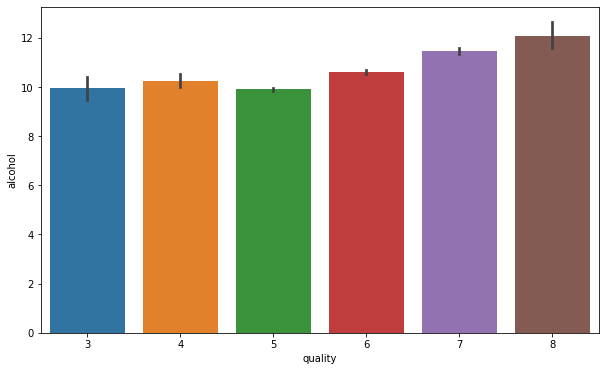

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'alcohol', data = df)

In [15]:
# # plot pairplot
# sb.pairplot(df)
# #show graph
# plt.show()


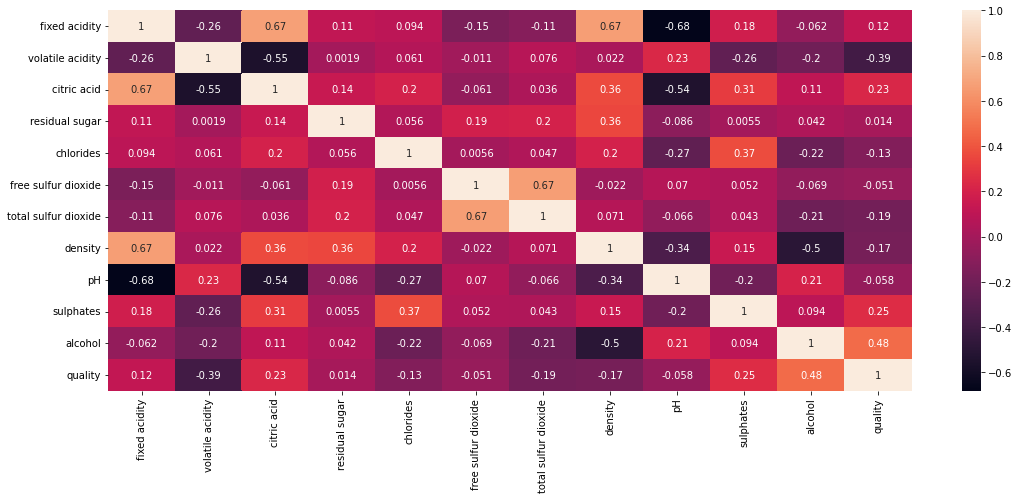

In [16]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

#Encoding the output

In [17]:
# count the number of patterns belongs to each classes
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


[5 6 7 4 8 3]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


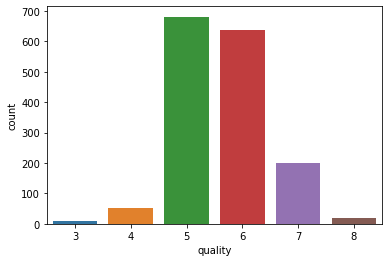

In [18]:
print(df.quality.unique())

sb.countplot(df["quality"])

so, with the help of the abouve graph we can see that there is class imbalance issue in the dataset so we need to fix this.
We are fixing this issue by only taking two classes bad and good wine only.
we will divide the quality into these two classes.

quality 1 to 6 will belong to bad quality of the wine.
quality 7 to 10 will belong to good quality of the wine.

In [19]:
# Dividing wine as good and bad by giving the limit for the quality

bins = (1, 6, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

0    1382
1     217
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


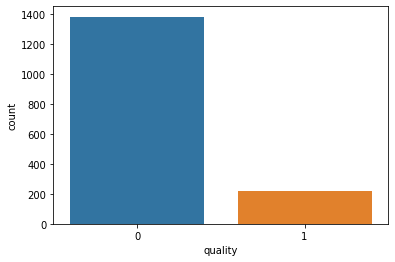

In [20]:
# Now lets assign a labels to our variable = 'quality'

label_quality = LabelEncoder()

# Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])

# count the number of patterns belongs to each classes
print(df['quality'].value_counts())

# printing the plot to see the classes
sb.countplot(df['quality'])
plt.show()

In [21]:
# dividing the colums

X = df.loc[:, df.columns != 'quality']
Y = df.loc[:, df.columns == 'quality']

#Normalizing the dataset

In [22]:
#  normalizing the dataset using absolute maxima method

# X = pd.DataFrame(MaxAbsScaler().fit_transform(X))
# X.describe()
# using MaxAbsScaler() normalization, Logistic regression was giving the accuracy of 85.625% while using MinMaxScaler() the Logistic regression accuracy was
#  increased to 86.56%.
#  Even after hyperparameter tunning too, the accuracy of  MaxAbsScaler() normalization was 86.56% and while of MinMaxScaler() is 87.5%.
#  So we are using the MinMaxScaler() method to normalize the dataset

#  normalizing the dataset using  min-max method
X = pd.DataFrame(MinMaxScaler().fit_transform(X))
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Dividing the dataset into test, validation and training sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=40)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, random_state=25)

In [24]:
print(y_test['quality'].value_counts())
print(y_validation['quality'].value_counts())

0    274
1     46
Name: quality, dtype: int64
0    274
1     46
Name: quality, dtype: int64


In [25]:
# reshaping y_train, y_test, y_validation
# y_train = y_train.to_numpy().ravel('F')
# y_validation = y_validation.to_numpy().ravel('F')
# y_test = y_test.to_numpy().ravel('F')

In [26]:
print(y_train.shape , y_validation.shape , y_test.shape)


(959, 1) (320, 1) (320, 1)


#Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

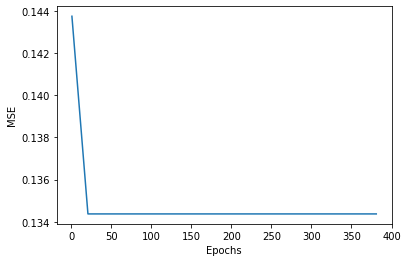

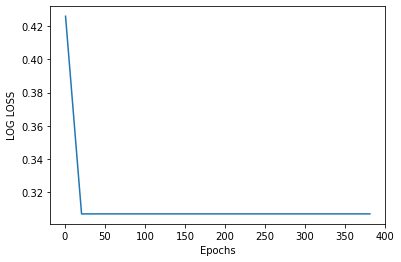

In [27]:
# Logistic_regression = LogisticRegression()

# Logistic_regression.fit(x_train, y_train)

# y_valid_predict = Logistic_regression.predict(x_validation)

# print(classification_report(y_validation, y_valid_predict))
# print("-"*100)
# print('Training set accuracy',str(Logistic_regression.score(x_train, y_train)*100)+"%")
# print('Validation set accuracy',str(accuracy_score(y_validation, y_valid_predict)*100)+"%")
# # print('Validation set accuracy',Logistic_regression.score(x_validation, y_validation))
# print("-"*100)

# all parameters not specified are set to their defaults
mse_score = []
log_loss_score = []
epoch = list(range(1, 400, 20))

for val in range(1, 400, 20):
  clf =LogisticRegression(max_iter=val)

  clf.fit(x_train,y_train)
  y_valid_predict = clf.predict(x_validation)

  # print(classification_report(y_validation, y_valid_predict))
  # print("-"*100)
  # print('Training set accuracy',str(clf.score(x_train, y_train)*100)+"%")
  # print('Validation set accuracy',str(accuracy_score(y_validation, y_valid_predict)*100)+"%")


  # print('Validation set accuracy',Logistic_regression.score(x_validation, y_validation))
  # print("-"*100)

  # Use score method to get accuracy of model
  loss = mean_squared_error(y_validation,y_valid_predict)
  y_valid_predict_prob = clf.predict_proba(x_validation)
  log_error = log_loss(y_validation,y_valid_predict_prob)
  mse_score.append(loss)
  log_loss_score.append(log_error)

plt.plot(epoch, mse_score)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(epoch, log_loss_score)
plt.xlabel('Epochs')
plt.ylabel('LOG LOSS')
plt.show()


In [28]:
print("Training set accuracy : ",str(accuracy_score(y_train, clf.predict(x_train))*100)+"%")
print("Test set accuracy : ",str(accuracy_score(y_test, clf.predict(x_test))*100)+"%")

Training set accuracy :  88.11261730969761%
Test set accuracy :  86.5625%


#Hyperparamter Tunning

In [37]:
Logistic_regression = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    }
]

#  cv=2 because we are not using kFold validation here, so to divide folds into test and train we are using cv=2
hyper_Logistic = GridSearchCV(Logistic_regression, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

In [38]:
best_clf = hyper_Logistic.fit(x_train, y_train)

Fitting 2 folds for each of 320 candidates, totalling 640 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [39]:
best_clf.best_estimator_


LogisticRegression(C=10)

Training the model using best hyperparameters, and testing the model on validation set

In [41]:
Logistic_regression = LogisticRegression(C=10, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   solver='lbfgs', tol=0.0001,warm_start=False)

Logistic_regression.fit(x_train, y_train)

y_valid_predict = Logistic_regression.predict(x_validation)


print(classification_report(y_validation, y_valid_predict))
print("-"*100)
print('Training set accuracy',str(Logistic_regression.score(x_train, y_train)*100)+"%")
print('Validation set accuracy',str(accuracy_score(y_validation, y_valid_predict)*100)+"%")
print("-"*100)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       274
           1       0.61      0.37      0.46        46

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320

----------------------------------------------------------------------------------------------------
Training set accuracy 88.73826903023983%
Validation set accuracy 87.5%
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing the Logistic Regression model on Test set

In [42]:
y_test_predict = Logistic_regression.predict(x_test)

print(classification_report(y_test, y_test_predict))
# print('accuracy',accuracy_score(y_test, y_test_predict))
print('Test set accuracy',str(accuracy_score(y_test, y_test_predict)*100)+"%")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       274
           1       0.73      0.35      0.47        46

    accuracy                           0.89       320
   macro avg       0.81      0.66      0.70       320
weighted avg       0.87      0.89      0.87       320

Test set accuracy 88.75%


#Stochastic Gradient Descent *Classifier*

In [43]:
SGDmodel = SGDClassifier(penalty=None)

SGDmodel.fit(x_train, y_train)

y_valid_pred = SGDmodel.predict(x_validation)

print(classification_report(y_validation, y_valid_predict))
print("-"*100)
print('Training set accuracy',SGDmodel.score(x_train, y_train))
print('Validation set accuracy',accuracy_score(y_validation, y_valid_predict))
print("-"*100)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       274
           1       0.61      0.37      0.46        46

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320

----------------------------------------------------------------------------------------------------
Training set accuracy 0.8738269030239834
Validation set accuracy 0.875
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print('Test set accuracy',accuracy_score(y_test, SGDmodel.predict(x_test)))

Test set accuracy 0.865625


HyperParameter tunning in Stochastic Gradient Descent Classifier

In [45]:
param_grid = {
    "loss" : ["log", "squared_loss"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1],
    "penalty" : ["l2", "l1", "none"],
}

In [46]:
#  cv=2 because we are not using kFold validation here, so to divide folds into test and train we are using cv=2
clf = GridSearchCV(SGDmodel, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

best_clf = clf.fit(x_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
best_clf.best_estimator_


SGDClassifier(loss='log', penalty='l1')

In [48]:
SGDmodel = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_loss',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGDmodel.fit(x_train, y_train)

y_valid_pred = SGDmodel.predict(x_validation)

print(classification_report(y_validation, y_valid_predict))
print("-"*100)
print('Training set accuracy',str(SGDmodel.score(x_train, y_train)*100)+"%")
print('Validation set accuracy',str(accuracy_score(y_validation, y_valid_predict)*100)+"%")
print("-"*100)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       274
           1       0.61      0.37      0.46        46

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320

----------------------------------------------------------------------------------------------------
Training set accuracy 87.90406673618352%
Validation set accuracy 87.5%
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#  Testing the model for test set

y_test_predict = SGDmodel.predict(x_test)

print(classification_report(y_test, y_test_predict))
print("-"*100)
print('accuracy',str(accuracy_score(y_test, y_test_predict)*100)+"%")
print("-"*100)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       274
           1       0.64      0.15      0.25        46

    accuracy                           0.87       320
   macro avg       0.76      0.57      0.59       320
weighted avg       0.84      0.87      0.83       320

----------------------------------------------------------------------------------------------------
accuracy 86.5625%
----------------------------------------------------------------------------------------------------


#KFold Cross Validation

In [50]:
# shuffel the dataset
X, y = shuffle(X, Y, random_state=100)

overall_training = []
overall_testing = []
Logistic_regression = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='lbfgs')


# spliting the dataset into 5 Folds
def fold(x_actual,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(x_actual)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(x_actual):

    X_train, X_test = x_actual[train_index], x_actual[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]

    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)

  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  for i in range(0, 5):
    all_y_train[i] = all_y_train[i].flatten()

  return all_x_train, all_x_test, all_y_train, all_y_test

In [51]:
# runing kFold and keeing the output of the function into variables

all_x_train, all_x_test, all_y_train, all_y_test = fold(X.iloc[:,:-1].values, Y.iloc[:,-1].values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [56]:
# #Start with logistic regression model

# # for 5 fold

overall_training = []
overall_testing = []
Logistic_regression = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='lbfgs')
for i in range(0, 5): 
  print("For fold no:", i+1)

  Logistic_regression.fit(all_x_train[i], all_y_train[i])
  predicted = Logistic_regression.predict(all_x_test[i])

  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 2-classes: ")
  out_labels = [0, 1]
  #Start with logistic regression model

  print(classification_report(all_y_test[i], predicted))


  print("-"*100)
  print("Accuracy on training data: " + str(Logistic_regression.score(all_x_train[i], all_y_train[i])*100) + "%")
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100)+ "%")
  print("-"*100)

  overall_training.append(Logistic_regression.score(all_x_train[i], all_y_train[i]))
  overall_testing.append(accuracy_score(all_y_test[i], predicted))  




For fold no: 1
Confusion Matrix : 
[[273   0]
 [ 47   0]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

----------------------------------------------------------------------------------------------------
Accuracy on training data: 86.70836591086787%
Testing Accuracy Score: 85.3125%
----------------------------------------------------------------------------------------------------
For fold no: 2
Confusion Matrix : 
[[283   0]
 [ 37   0]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [57]:
print("Overall Training accuracy is "+str(np.array(overall_training).mean()*100)+"%")
print("Overall Testing accuracy is "+str(np.array(overall_testing).mean()*100)+"%")

Overall Training accuracy is 86.42900948006256%
Overall Testing accuracy is 86.42887931034483%


#Perceptron Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/l

1
2
3
4
5
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

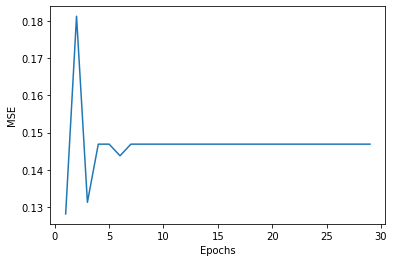

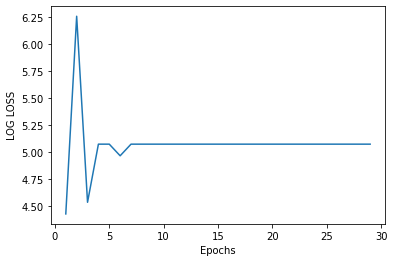

In [58]:
mse_score = []
log_loss_score = [] 
epoch = list(range(1, 30))

for val in range(1, 30):
  clf =Perceptron(tol=1e-3, random_state=0, max_iter=val)

  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_validation)
  # Use score method to get accuracy of model
  loss = mean_squared_error(y_validation,y_pred)
  mse_score.append(loss)

  log_error = log_loss(y_validation,y_pred)
  log_loss_score.append(log_error)

  print(clf.n_iter_)

plt.plot(epoch, mse_score)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(epoch, log_loss_score)
plt.xlabel('Epochs')
plt.ylabel('LOG LOSS')
plt.show()




# percept = Perceptron(penalty = 'l2', tol=1e-3, random_state=0)
# percept.fit(x_train, y_train)
# percept.score(x_validation, y_validation)

In [59]:
# clf =Perceptron(tol=1e-3, random_state=0, max_iter=10)
# clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
print(classification_report(y_test, y_test_pred))
print('accuracy',str(accuracy_score(y_test, y_test_pred)*100)+"%")

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       274
           1       0.00      0.00      0.00        46

    accuracy                           0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.86      0.79       320

accuracy 85.625%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print('accuracy',str(accuracy_score(y_train, clf.predict(x_train))*100)+"%")

accuracy 86.96558915537018%


#Single Layer Perceptron

In [61]:

def activation_func(value):    #Tangent Hypotenuse
    #return (1/(1+np.exp(-value)))
    return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))

In [62]:
def perceptron_train(in_data,labels,alpha):
    X=np.array(in_data)
    y=np.array(labels)
    weights=np.random.random(X.shape[1])
    original=weights
    bias=np.random.random_sample()
    for key in range(X.shape[0]):
        a=activation_func(np.matmul(np.transpose(weights),X[key]))     
        yn=0
        if a>=0.7:
            yn=1
        elif a<=(-0.7):
            yn=-1
        weights=weights+alpha*(yn-y[key])*X[key]
        print('Iteration '+str(key)+': '+str(weights))
    print('Difference: '+str(weights-original))
    return weights

In [63]:
def perceptron_test(in_data,label_shape,weights):
    X=np.array(in_data)
    y=np.zeros(label_shape)
    for key in range(X.shape[1]):
        a=activation_func((weights*X[key]).sum())
        y[key]=0
        if a>=0.7:
            y[key]=1
        elif a<=(-0.7):
            y[key]=-1
    return y

In [64]:
def score(result,labels):
    difference=result-np.array(labels)                                                        
    correct_ctr=0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            correct_ctr+=1
    score=correct_ctr*100/difference.size
    print('Score='+str(score))

In [65]:
# Learning rate
alpha = 0.01

# Train
weights = perceptron_train(x_train, y_train, alpha)

Iteration 0: [0.78046251 0.53003249 0.9247843  0.57543293 0.26585347 0.05788038
 0.90607533 0.05473251 0.59534998 0.80972945 0.10842117]
Iteration 1: [0.7828519  0.53181332 0.9268843  0.57618636 0.2669887  0.05872545
 0.90710007 0.05915982 0.59999565 0.81056777 0.11011348]
Iteration 2: [0.78568375 0.53619688 0.9272843  0.57714526 0.26832426 0.06069728
 0.90879618 0.06424793 0.60409014 0.81248394 0.11226733]
Iteration 3: [0.78568375 0.53619688 0.9272843  0.57714526 0.26832426 0.06069728
 0.90879618 0.06424793 0.60409014 0.81248394 0.11226733]
Iteration 4: [0.78948906 0.54136811 0.9285843  0.57889184 0.26959304 0.06111981
 0.90907886 0.07109815 0.60960195 0.81362167 0.11703656]
Iteration 5: [0.79347136 0.54205304 0.9309843  0.57971375 0.27069488 0.06111981
 0.90985625 0.07765468 0.61487754 0.8168552  0.11995963]
Iteration 6: [0.80046251 0.54383386 0.9369843  0.58087814 0.2718468  0.06534517
 0.91218841 0.08465175 0.61771219 0.81925041 0.1231904 ]
Iteration 7: [0.80355986 0.54561469 0.941

In [66]:
# Test
result_test=perceptron_test(x_test,y_test.shape,weights)

In [67]:

# Calculate score
score(result_test,y_test)

Score=84.0625


In [68]:
score(perceptron_test(x_train, y_train.shape, weights), y_train)

Score=86.2356621480709


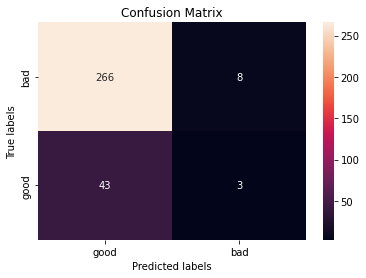

In [69]:

ax= plt.subplot()
cm = confusion_matrix(y_test, result_test)
sb.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); ax.yaxis.set_ticklabels(['bad', 'good']);

#MLP Model

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged

1
6
11
16
21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

26
31
36


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

41
46


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (56) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

51
56


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (66) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

61
66


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (76) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

71
76


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

81
86


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (91) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


91


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (96) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


101


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (106) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


106


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (111) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


111


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (116) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


116


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (121) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


121


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


126


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


131


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (136) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


136


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


141


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (146) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


146


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


151


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (156) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


156
161


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


153


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


171
139


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


176


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


176


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


172


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


170


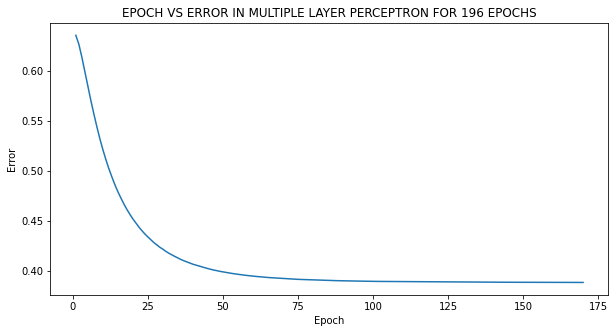

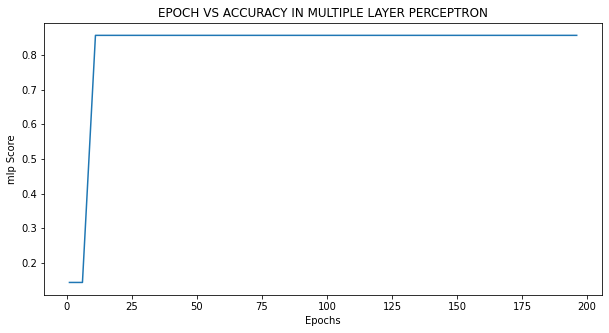

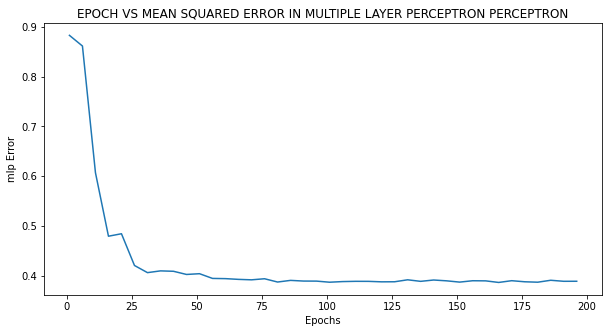

In [72]:
from sklearn.neural_network import MLPClassifier

mlp_score = []
mlp_error = []
epoch = list(range(1, 200, 5))

for i in range(1, 200, 5):
  
  mlp = MLPClassifier(hidden_layer_sizes=(11), activation='logistic', solver='sgd', shuffle=True, alpha=min(0.5, i / 1000), tol=0.00001, max_iter=i,verbose=False)

  mlp.fit(x_train, y_train)
  mlp_prediction = mlp.predict(x_validation)
  score = mlp.score(x_validation, y_validation)
  # print(mlp.loss_curve_)
  # print(f"mlp Score: {mlp_score}")
  mlp_score.append(score)
  mlp_error.append(mlp.loss_curve_[-1])
  print(mlp.n_iter_)

y = mlp.loss_curve_
epoch_2 = list(range(1, len(y) + 1))
plt.figure(figsize=(10, 5))
plt.plot(epoch_2, y)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title(f'EPOCH VS ERROR IN MULTIPLE LAYER PERCEPTRON FOR {i} EPOCHS')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epoch, mlp_score)
plt.xlabel('Epochs')
plt.ylabel('mlp Score')
plt.title('EPOCH VS ACCURACY IN MULTIPLE LAYER PERCEPTRON')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch, mlp_error)
plt.xlabel('Epochs')
plt.ylabel('mlp Error')
plt.title('EPOCH VS MEAN SQUARED ERROR IN MULTIPLE LAYER PERCEPTRON PERCEPTRON')
plt.show()

In [73]:
mlp = mlp = MLPClassifier(hidden_layer_sizes=(11), activation='logistic', solver='sgd', shuffle=True, alpha=min(0.5, i / 1000), tol=0.00001, max_iter=200,verbose=False)
mlp.fit(x_train, y_train)
y_test_pred = mlp.predict(x_test)
print(classification_report(y_test, y_test_pred))
print('accuracy',str(accuracy_score(y_test, y_test_pred)*100)+"%")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       274
           1       0.00      0.00      0.00        46

    accuracy                           0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.86      0.79       320

accuracy 85.625%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print('accuracy',str(accuracy_score(y_train,  mlp.predict(x_train))*100)+"%")

accuracy 86.96558915537018%
